In [ ]:
# cod to make ktau comparison figure against random

In [7]:
import numpy as np
import scipy.stats as stats
from numpy.random import rand
import matplotlib.pyplot as plt
from scipy.stats import norm  

In [8]:
with open('./ranking.csv','w') as writefile:
    
    ref = open('./Answers.csv','r')
    for rank,line in enumerate(ref,1):
        newline = str(rank)+ line[line.index(','):]
        writefile.write(newline)

In [9]:
# calculating random ranks

with open("./Answers.csv","r") as input_file:
    content1 = input_file.readlines()
contentScore = [x.strip().split(',')[1] for x in content1] 
#contentLigand = [x.strip().split(',')[0] for x in content1]
# Note: 

kendallNew = []

for i in range(10000):
    random = []
    for i in range(459):
        randomNum = np.random.randint(1,460)
        random.append(randomNum)
    tau = stats.kendalltau(random,rank2)
    kendallNew.append(tau[0])
    

average = np.mean(kendallNew)
print(average)

standard_Deviation = np.std(kendallNew)
print(standard_Deviation)


-0.0002399125903544141
0.03127695193683465


In [ ]:
#finds the mean and standard deviation of a random ranking Kendall's Tau
with open("/home/dhkumar/Downloads/ProteinRanks.csv","r") as input_file:
    content1 = input_file.readlines()
contentScore = [x.strip().split(',')[2] for x in content1] 
contentLigand = [x.strip().split(',')[0] for x in content1]


Score = contentScore[1:460]
Score.reverse()
Score = [ float(x) for x in Score ]

Ligand = contentLigand[1:460]
Ligand.reverse()
Ligand = [ int(x) for x in Ligand ]

Rank = np.arange(1,460)

for i in range(0,457):
    if Score[i] == Score[i+1]:
        Rank[i+1] = Rank[i]

rank2 = np.arange(459)
for i in range(len(Rank)):
    rank2[Ligand[i]-1] = Rank[i]

kendallNew = []

for i in range(10000):
    random = []
    for i in range(459):
        randomNum = np.random.randint(1,460)
        random.append(randomNum)
    tau = stats.kendalltau(random,rank2)
    kendallNew.append(tau[0])
    

average = np.mean(kendallNew)
print(average)

standard_Deviation = np.std(kendallNew)
print(standard_Deviation)

In [10]:
# gaussian distributed random numbers with mu =4 and sigma=2                     
x = kendallNew

mean = np.mean(x)
sigma = np.std(x)

x_plot = np.linspace(min(x), max(x), 1000)                                                               


In [11]:
Norm = norm.pdf(x_plot,mean,sigma)

#finds the bins that are within the first SD
SD1 = []
for i in x_plot:
    if i <=mean+standard_Deviation and i>=mean-standard_Deviation:
        SD1.append(i)

#lower bound of SD1
SD1Low = min(SD1)

#upper bound of SD1
SD1High= max(SD1)

SD1LowBin = 0
SD1HighBin = 0
for i in range(len(x_plot)):
    if x_plot[i] == SD1Low:
        SD1LowBin = i 
    if x_plot[i] == SD1High:
        SD1HighBin = i    

x_plotnew1 = x_plot[SD1LowBin:SD1HighBin]
width1 = x_plotnew1[1]-x_plotnew1[0]
norm_values1 = Norm[SD1LowBin:SD1HighBin]


In [12]:
SD2 = []
for i in x_plot:
    if i <=mean+(2*standard_Deviation) and i>=mean-(2*standard_Deviation):
        SD2.append(i)
        
#lower bound of SD2
SD2Low = min(SD2)

#upper bound of SD2
SD2High= max(SD2)

SD2LowBin = 0
SD2HighBin = 0
for i in range(len(x_plot)):
    if x_plot[i] == SD2Low:
        SD2LowBin = i 
    if x_plot[i] == SD2High:
        SD2HighBin = i    


x_plotnew2 = x_plot[SD2LowBin:SD2HighBin]
norm_values2 = Norm[SD2LowBin:SD2HighBin]


In [71]:
import matplotlib as mplt

font = {'family' : 'sans-serif',
        'sans-serif': 'Arial'}

mplt.rc('font', **font)

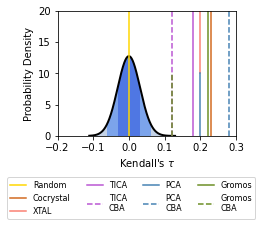

In [89]:
#PDF
plt.figure(figsize=(3.2,2.3))
plt.plot(x_plot, norm.pdf(x_plot, mean, sigma), 'r-', color = 'black', linewidth=2)    

#Coloring the Standard Deviations
plt.bar(x_plot, Norm, width1, align = 'edge', alpha = 0.75, color = 'lightsteelblue') 
plt.bar(x_plotnew2, norm_values2, width1, align = 'edge', alpha = 0.75, color = 'cornflowerblue')
plt.bar(x_plotnew1, norm_values1, width1, align = 'edge',alpha = 0.75, color = 'royalblue')

#Vertical lines for Kendall's Taus
#uncomment code as needed to make different figures

#OpenEye, Avg
#plt.axvline(mean, color = 'gold', linestyle = '--', ymax = 12.630594844422115/20, label = 'Random(' + r"$\tau$"+' = -0.0001)')
#plt.axvline(-0.098, color = 'green', label = 'Gromos(' + r"$\tau$"+' = 0.224)')
#plt.axvline(-0.097, color = 'blue', label = 'Gromos CBA(' + r"$\tau$"+' = 0.123)')
#plt.axvline(-0.088, color = 'orange', label = 'PCA(' + r"$\tau$"+' = 0.178)')
#plt.axvline(-0.209, color = 'red', label = 'PCA CBA(' + r"$\tau$"+' = 0.283)')
#plt.axvline(-0.131, color = 'brown', label = 'TICA(' + r"$\tau$"+' = 0.180)')
#plt.axvline(-0.090, color = 'purple', label = 'TICA CBA(' + r"$\tau$"+' = 0.166)')

#OpenEye, WA
#plt.axvline(mean, color = 'gold', linestyle = '--', ymax = 12.630594844422115/20, label = 'Random(' + r"$\tau$"+' = -0.0001)')
#plt.axvline(-0.043, color = 'green', label = 'Gromos(' + r"$\tau$"+' = 0.224)')
#plt.axvline(-0.058, color = 'brown', label = 'Gromos CBA(' + r"$\tau$"+' = 0.123)')
#plt.axvline(-0.199, color = 'orange', label = 'PCA(' + r"$\tau$"+' = 0.178)')
#plt.axvline(-0.093, color = 'red', label = 'PCA CBA(' + r"$\tau$"+' = 0.283)')
#plt.axvline(-0.109, color = 'blue', label = 'TICA(' + r"$\tau$"+' = 0.180)')
#plt.axvline(-0.112, color = 'purple', label = 'TICA CBA(' + r"$\tau$"+' = 0.166)')

# OpenEye, Lowest
#plt.axvline(mean, color = 'gold', label = 'Random(' + r"$\tau$"+' = -0.0001)')
#plt.axvline(-0.18, color = 'b', label = 'PCA')
#plt.axvline(-0.05, color = 'b', linestyle = '--',label = 'PCA CBA')
#plt.axvline(0.04, color = 'r', label = 'TICA')
#plt.axvline(-0.06, color = 'g', ymin = 0.5,label = 'Gromos')
#plt.axvline(-0.06, color = 'r',linestyle = '--', ymax = 0.5, label = 'TICA CBA')
#plt.axvline(-0.08, color = 'magenta',ymin = 0.5,label = 'XTAL')
#plt.axvline(-0.08, color = 'g',linestyle = '--',ymax = 0.5, label = 'Gromos CBA')




#Glide, Avg
#plt.axvline(mean, color = 'gold', linestyle = '--', ymax = 12.630594844422115/20, label = 'Random(' + r"$\tau$"+' = -0.0001)')
#plt.axvline(0.245, color = 'green', label = 'Gromos(' + r"$\tau$"+' = 0.224)')
#plt.axvline(0.225, color = 'blue', label = 'Gromos CBA(' + r"$\tau$"+' = 0.123)')
#plt.axvline(0.209, color = 'orange', label = 'PCA(' + r"$\tau$"+' = 0.178)')
#plt.axvline(0.244, color = 'red', label = 'PCA CBA(' + r"$\tau$"+' = 0.283)')
#plt.axvline(0.197, color = 'brown', label = 'TICA(' + r"$\tau$"+' = 0.180)')
#plt.axvline(0.201, color = 'purple', label = 'TICA CBA(' + r"$\tau$"+' = 0.166)')

#Glide, WA
#plt.axvline(mean, color = 'gold', linestyle = '--', ymax = 12.630594844422115/20, label = 'Random(' + r"$\tau$"+' = -0.0001)')
#plt.axvline(0.183, color = 'green', label = 'Gromos(' + r"$\tau$"+' = 0.224)')
#plt.axvline(0.210, color = 'blue', label = 'Gromos CBA(' + r"$\tau$"+' = 0.123)')
#plt.axvline(0.203, color = 'orange', label = 'PCA(' + r"$\tau$"+' = 0.178)')
#plt.axvline(0.242, color = 'red', label = 'PCA CBA(' + r"$\tau$"+' = 0.283)')
#plt.axvline(0.207, color = 'brown', label = 'TICA(' + r"$\tau$"+' = 0.180)')
#plt.axvline(0.172, color = 'purple', label = 'TICA CBA(' + r"$\tau$"+' = 0.166)')

  
#Glide , Lowest
plt.axvline(mean, color = 'gold', label = 'Random')#(' + r"$\tau$"+' = -0.0001)')
plt.axvline(0.23, color = 'chocolate', label = 'Cocrystal')#('+r'$\tau$'+' = 0.232)')
plt.axvline(0.20, color = 'salmon', ymin = 10.0/20, label = 'XTAL')#(' + r"$\tau$"+' = 0.166)')

plt.axvline(0.18, color = 'mediumorchid', label = 'TICA')#(' + r"$\tau$"+' = 0.180)')
plt.axvline(0.12, color = 'mediumorchid', linestyle = '--', label = 'TICA\nCBA')#(' + r"$\tau$"+' = 0.166)')
plt.axvline(0.20, color = 'steelblue', ymax = 10.0/20,label = 'PCA')#(' + r"$\tau$"+' = 0.178)')
plt.axvline(0.28, color = 'steelblue', linestyle = '--', label = 'PCA\nCBA')#(' + r"$\tau$"+' = 0.283)')
plt.axvline(0.22, color = 'olivedrab', label = 'Gromos')#(' + r"$\tau$"+' = 0.224)')
plt.axvline(0.12, color = 'olivedrab', linestyle = '--', ymax = 10.0/20,label = 'Gromos\nCBA')#(' + r"$\tau$"+' = 0.123)')

plt.xlim(-0.20,0.30)



plt.ylim(top=20)
plt.xlabel("Kendall's "+ r"$\tau$")
plt.ylabel('Probability Density')
plt.legend(ncol = 4, bbox_to_anchor=(0.93, -0.7, 0.2, 0.4),  prop={'size': 8})
#plt.tight_layout()
#plt.title("Clustering Methods vs Random Rank Ordering \n (OpenEye: WA)")
#plt.savefig('./ktau_random.pdf', dpi = 300)
plt.savefig('./legend.png', dpi = 300,bbox_inches = 'tight')


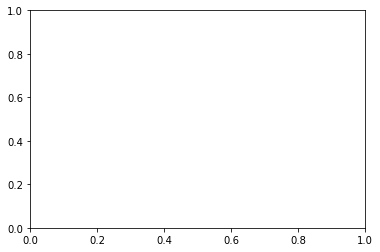

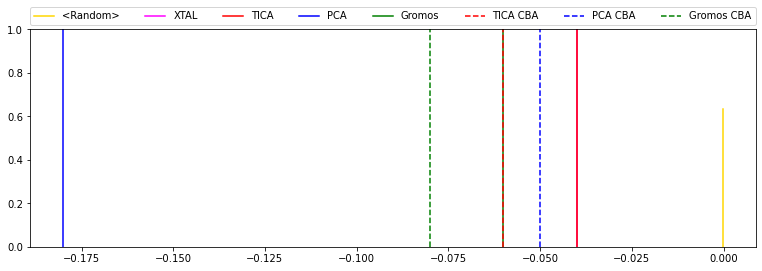

In [13]:
#used to create legend of specified width
plt.subplot(1,1,1)
plt.figure(figsize=(13,4))

plt.axvline(mean, color = 'gold', ymax = 12.630594844422115/20, label = '<Random>')

plt.axvline(-0.04, color = 'magenta', label = 'XTAL')

plt.axvline(-0.04, color = 'r', label = 'TICA')
plt.axvline(-0.18, color = 'b', label = 'PCA')
plt.axvline(-0.06, color = 'g', label = 'Gromos')

plt.axvline(-0.06, color = 'r', linestyle = '--', label = 'TICA CBA')
plt.axvline(-0.05, color = 'b', linestyle = '--', label = 'PCA CBA')
plt.axvline(-0.08, color = 'g', linestyle = '--', label = 'Gromos CBA')





# Place a legend above this subplot, expanding itself to
# fully use the given bounding box.
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=8, mode="expand", borderaxespad=0.)
#plt.savefig("/home/dhkumar/Pictures/figures/RandomFig/Scale1.pdf")
plt.show()
